<a href="https://colab.research.google.com/github/padmini89/padmini-eng/blob/master/dog%2Ccat%2Cpanda_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/sumandeepb/DL-V1-IntroToCNNs.git

Cloning into 'DL-V1-IntroToCNNs'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 55 (delta 15), reused 46 (delta 11), pack-reused 0
Unpacking objects: 100% (55/55), done.


In [0]:

# import tensorflow module. Check API version.
import tensorflow as tf
import numpy as np

print (tf.__version__)

# required for TF to run within docker using GPU (ignore otherwise)
#gpu = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpu[0], True)

2.2.0


In [0]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define training data augmentation pipeline
train_datagen = ImageDataGenerator( rescale = 1.0/255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# load training data
TRAINING_DIR = '/content/drive/My Drive/dog,cat,panda dataset/training '
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

# define validation data augmentation pipeline
validation_datagen = ImageDataGenerator( rescale = 1.0/255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# load validation data
VALIDATION_DIR = '/content/drive/My Drive/dog,cat,panda dataset/testing '
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size=128,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 2700 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [0]:
# initialize the model
model = tf.keras.models.Sequential([
    # Conv Layer 1
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    # Conv Layer 2
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Conv Layer 3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Conv Layer 4
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # FC layer 1
    tf.keras.layers.Dense(512, activation='relu'), 

    # FC layer 2
    tf.keras.layers.Dense(512, activation='relu'), 

    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(3, activation='softmax')
])

# compile the model
print("[INFO] compiling model...")
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy"])

# print model summary
model.summary()


[INFO] compiling model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (

In [0]:
# define callback function for training termination criteria
#accuracy_cutoff = 0.99
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if(logs.get('accuracy') > 0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

# initialize training config
epochs = 100

# run training
print("[INFO] training...")
history = model.fit(train_generator, validation_data=validation_generator,
                    epochs=epochs, verbose=1, callbacks=[myCallback()])



[INFO] training...
Epoch 1/100
22/22 [==============================] - 1856s 84s/step - loss: 1.1547 - accuracy: 0.4063 - val_loss: 1.0657 - val_accuracy: 0.3833
Epoch 2/100
22/22 [==============================] - 25s 1s/step - loss: 0.9334 - accuracy: 0.5007 - val_loss: 0.8456 - val_accuracy: 0.5400
Epoch 3/100
22/22 [==============================] - 25s 1s/step - loss: 0.9229 - accuracy: 0.5378 - val_loss: 0.8819 - val_accuracy: 0.5433
Epoch 4/100
22/22 [==============================] - 26s 1s/step - loss: 0.8794 - accuracy: 0.5559 - val_loss: 0.8674 - val_accuracy: 0.5433
Epoch 5/100
22/22 [==============================] - 25s 1s/step - loss: 0.9318 - accuracy: 0.5622 - val_loss: 0.7750 - val_accuracy: 0.5833
Epoch 6/100
22/22 [==============================] - 25s 1s/step - loss: 0.8378 - accuracy: 0.5793 - val_loss: 0.7370 - val_accuracy: 0.6433
Epoch 7/100
22/22 [==============================] - 25s 1s/step - loss: 0.8424 - accuracy: 0.5826 - val_loss: 0.7853 - val_accuracy

Text(0.5, 1.0, 'Training and validation loss')

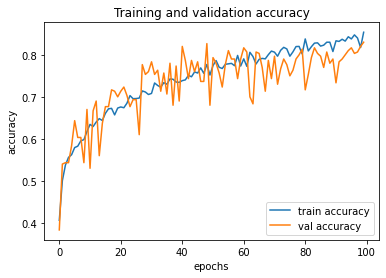

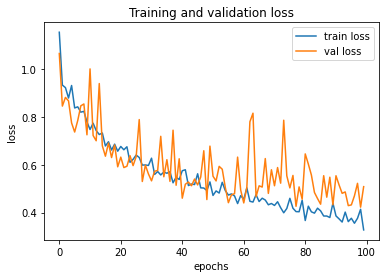

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

# retrieve a list of list results on training and test data sets for each training epoch
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # get number of epochs

# plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.title('Training and validation accuracy')
plt.figure()

# plot training and validation loss per epoch
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.title('Training and validation loss')

In [0]:
!git clone https://github.com/kohpangwei/influence-release.git

Cloning into 'influence-release'...
remote: Enumerating objects: 59, done.
remote: Total 59 (delta 0), reused 0 (delta 0), pack-reused 59
Unpacking objects: 100% (59/59), done.
Checking out files: 100% (42/42), done.


In [0]:

from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None)

pre_trained_weights_file = '/content/influence-release/inception/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model.load_weights(pre_trained_weights_file)

pre_trained_model.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [0]:

last_output = pre_trained_model.get_layer('mixed10').output

base_model = tf.keras.Model(pre_trained_model.input, last_output)

base_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
______________________________________________________________________________________________

In [0]:

# initialize the model
extended_model = tf.keras.Sequential([
    # base model (part of Inception V3)
    base_model,
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 

    # Only 1 output neuron.
    # It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
print("[INFO] compiling model...")
extended_model.compile(optimizer=tf.keras.optimizers.Adam(),
        loss="categorical_crossentropy",
        metrics=["accuracy"])

# print model summary
extended_model.summary()

[INFO] compiling model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               9437696   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 31,503,649
Trainable params: 9,700,865
Non-trainable params: 21,802,784
_________________________________________________________________


In [0]:
# define callback function for training termination criteria
#accuracy_cutoff = 0.99
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if(logs.get('accuracy') > 0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

# initialize training config
epochs = 30

# run training
print("[INFO] training...")
history = extended_model.fit(train_generator, validation_data=validation_generator,
                    epochs=epochs, verbose=1, callbacks=[myCallback()])

[INFO] training...
Epoch 1/30
22/22 [==============================] - 27s 1s/step - loss: 1.1921e-07 - accuracy: 0.3522 - val_loss: 1.1921e-07 - val_accuracy: 0.3511
Epoch 2/30
22/22 [==============================] - 26s 1s/step - loss: 1.1921e-07 - accuracy: 0.3536 - val_loss: 1.1921e-07 - val_accuracy: 0.3500
Epoch 3/30
22/22 [==============================] - 26s 1s/step - loss: 1.1921e-07 - accuracy: 0.3527 - val_loss: 1.1921e-07 - val_accuracy: 0.3567
Epoch 4/30
22/22 [==============================] - 26s 1s/step - loss: 1.1921e-07 - accuracy: 0.3495 - val_loss: 1.1921e-07 - val_accuracy: 0.3533
Epoch 5/30
22/22 [==============================] - 26s 1s/step - loss: 1.1921e-07 - accuracy: 0.3542 - val_loss: 1.1921e-07 - val_accuracy: 0.3567
Epoch 6/30
22/22 [==============================] - 27s 1s/step - loss: 1.1921e-07 - accuracy: 0.3502 - val_loss: 1.1921e-07 - val_accuracy: 0.3544
Epoch 7/30
22/22 [==============================] - 26s 1s/step - loss: 1.1921e-07 - accuracy